In [1]:
library(googlesheets4)
library(ggplot2)


In [2]:
sheets_auth(path = "Z:/spreadsheet-service-302407.json")

ctrl_data <- read_sheet(
    ss="12yARRjZTZlD-tqx-bz7JYzwZ5XVVOf59o8kTbR0s4xw",
    range="Fig1a_F1_score_human_labor_plot"
)
ctrl_data

Warning message:
"`sheets_auth()` is deprecated as of googlesheets4 0.2.0.
Please use `gs4_auth()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."
Reading from "quantification_result"

Range "'Fig1a_F1_score_human_labor_plot'"

New names:
* `` -> ...11
* `` -> ...13
* `` -> ...14
* `` -> ...15
* `` -> ...16



No,Dataset名,修正者,Datasize (M voxel),修正時間(h:mm:ss),修正時間(min),修正前 F1Score,修正後 F1Score,Mito Volume(px3),F / I (min / Mvoxel)=,...11,教師データの枚数,...13,...14,...15,...16,memo
<dbl>,<chr>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
1,Ctrl_001/cropped_001,中村,26.2144,1899-12-30 00:12:42,12.70000,0.9707977,0.9728747,1793026,7.082998,NA,NA,NA,NA,NA,NA,mitoが2.よりも多かったので2.との差が小さく見える。
2,Ctrl_001/cropped_002,中村,26.2144,1899-12-30 00:20:09,20.15000,0.9159769,0.9603509,387488,52.001610,NA,NA,NA,NA,NA,NA,mitoが少なかったのもありすぐに終わった。ミトコンドリア体積か表面積での正規化が必要かもしれない。
NA,modified_2,中村,26.2144,1899-12-30 00:04:03,25.20000,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,OPA1_003/cropped_001,菅,26.2144,1899-12-30 03:42:37,222.61667,0.8054381,0.9429719,1754521,126.881734,NA,NA,NA,NA,NA,NA,心折れたのでとりあえずここまで。0.96にする方法がわかんない
4,OPA1_003/cropped_002,NA,26.2144,NA,NA,0.5520164,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,Ctrl_003/cropped_005,中村,26.2144,1899-12-30 01:37:16,96.26667,0.8602623,0.9786350,4774716,20.161758,NA,NA,NA,NA,NA,NA,NA
6,OPA1_003/cropped_002,菅,26.2144,1899-12-30 01:04:17,64.28333,0.8804500,0.9730801,3418044,18.807053,NA,NA,NA,NA,NA,NA,思ったより高精度だった。ミトコン多いのに。
7,Ctrl_001/cropped_001,菅,26.2144,1899-12-30 00:53:09,53.15000,0.8907744,0.9635085,1793026,29.642626,NA,NA,NA,NA,NA,NA,意外と早かった？
8,Ctrl_001/cropped_003,中村,26.2144,1899-12-30 00:42:17,42.28333,0.9385614,0.9646608,3851300,10.978977,NA,NA,NA,NA,NA,NA,NA


In [3]:
modified_data <- ctrl_data[!is.na(ctrl_data$"修正時間(min)"),]
target_data <- modified_data[!is.na(modified_data$"Mito Volume(px3)") & modified_data$"Mito Volume(px3)" > 1000000,]
target_data

No,Dataset名,修正者,Datasize (M voxel),修正時間(h:mm:ss),修正時間(min),修正前 F1Score,修正後 F1Score,Mito Volume(px3),F / I (min / Mvoxel)=,...11,教師データの枚数,...13,...14,...15,...16,memo
<dbl>,<chr>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
1,Ctrl_001/cropped_001,中村,26.2144,1899-12-30 00:12:42,12.70000,0.9707977,0.9728747,1793026,7.082998,NA,NA,NA,NA,NA,NA,mitoが2.よりも多かったので2.との差が小さく見える。
3,OPA1_003/cropped_001,菅,26.2144,1899-12-30 03:42:37,222.61667,0.8054381,0.9429719,1754521,126.881734,NA,NA,NA,NA,NA,NA,心折れたのでとりあえずここまで。0.96にする方法がわかんない
5,Ctrl_003/cropped_005,中村,26.2144,1899-12-30 01:37:16,96.26667,0.8602623,0.9786350,4774716,20.161758,NA,NA,NA,NA,NA,NA,NA
6,OPA1_003/cropped_002,菅,26.2144,1899-12-30 01:04:17,64.28333,0.8804500,0.9730801,3418044,18.807053,NA,NA,NA,NA,NA,NA,思ったより高精度だった。ミトコン多いのに。
7,Ctrl_001/cropped_001,菅,26.2144,1899-12-30 00:53:09,53.15000,0.8907744,0.9635085,1793026,29.642626,NA,NA,NA,NA,NA,NA,意外と早かった？
8,Ctrl_001/cropped_003,中村,26.2144,1899-12-30 00:42:17,42.28333,0.9385614,0.9646608,3851300,10.978977,NA,NA,NA,NA,NA,NA,NA
9,OPA1_003/cropped_001,菅,26.2144,1899-12-30 00:49:44,49.73333,0.9224425,0.9639902,1754521,28.345818,NA,NA,NA,NA,NA,NA,NA
11,OPA1_003/cropped_001,中村,26.2144,1899-12-30 00:56:29,56.48333,0.9095219,0.9531645,1754521,32.193022,NA,NA,NA,NA,NA,NA,NA
12,Ctrl_003/cropped_001,菅,26.2144,1899-12-30 00:35:21,35.35000,0.9328699,0.9734520,3775812,9.362225,NA,NA,NA,NA,NA,NA,NA


In [4]:
target_data_ <- data.frame(
    F1Score = c(target_data$"修正前 F1Score"),
    Time = target_data$"修正時間(min)"
)
target_data_

F1Score,Time
<dbl>,<dbl>
0.9707977,12.70000
0.8054381,222.61667
0.8602623,96.26667
0.8804500,64.28333
0.8907744,53.15000
0.9385614,42.28333
0.9224425,49.73333
0.9095219,56.48333
0.9328699,35.35000


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
"Use of `target_data$`修正前 F1Score`` is discouraged. Use `修正前 F1Score` instead."
Warning message:
"Use of `target_data$"修正時間(min)"` is discouraged. Use `修正時間(min)` instead."
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsA

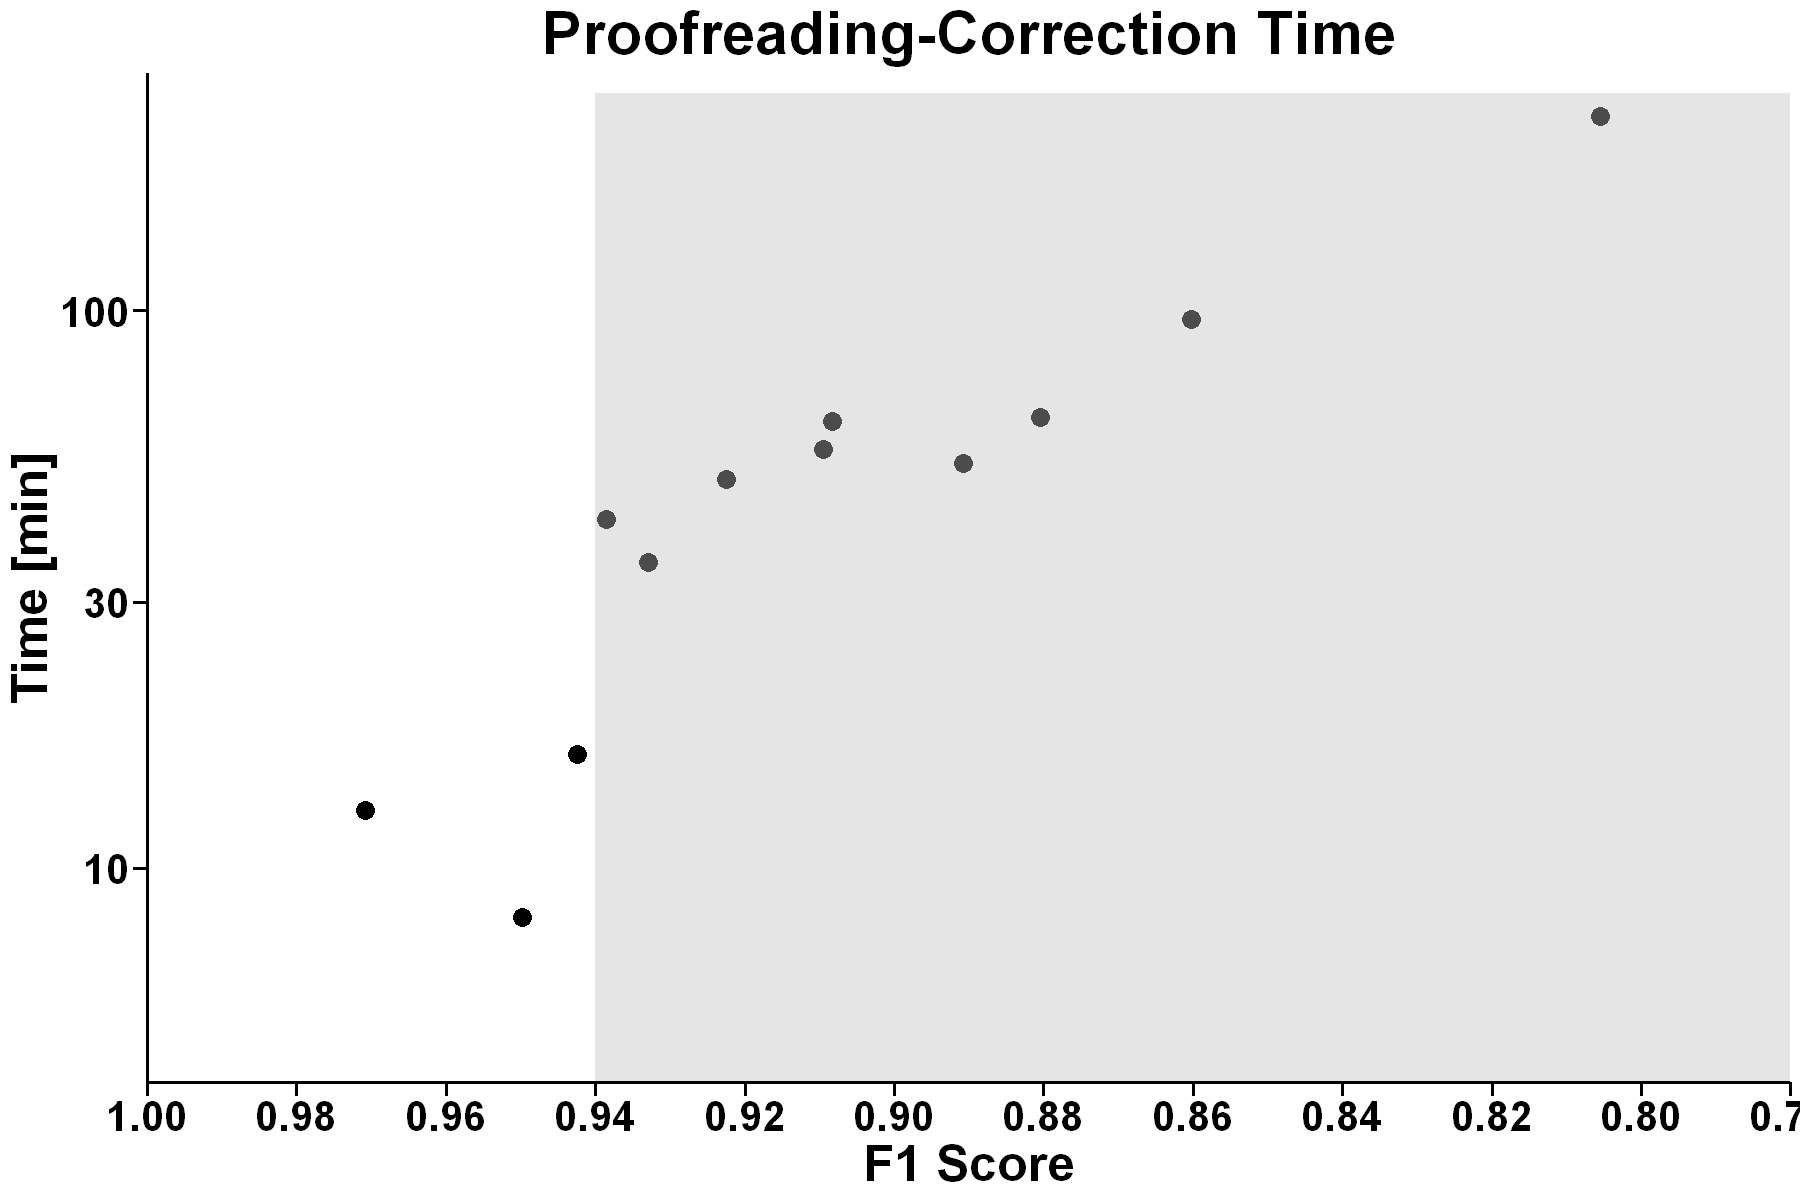

In [5]:
options(repr.plot.width=15, repr.plot.height=10)

graph <- ggplot(NULL)




graph <- graph + labs(
    x = "F1 Score",
    y = "Time [min]",
    title = "Proofreading-Correction Time"
) + theme(
    #axis.title.x = element_text(size = 24, face = "bold"),
    title = element_text(size = 30, colour="black", face = "bold", family = "Helvetica"),
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(size = 1, colour="black"),
    axis.title.x = element_text(size = 30, face = "bold", family = "Helvetica"),
    axis.text.x = element_text(size = 25, face = "bold", family = "Helvetica", color="black"),
    axis.title.y = element_text(size = 30, face = "bold", family = "Helvetica"),
    axis.text.y = element_text(size = 25, face = "bold", family = "Helvetica", color="black"),
    panel.background = element_blank(), 
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.ticks = element_line(colour = "black", size=1),
    axis.ticks.length = unit(3, "mm")
) + scale_y_continuous(
    expand = c(0,0), 
    limits=c(0, 1.1* max(target_data$"修正時間(min)") )
)  + scale_x_continuous(
    expand = c(0,0), 
    limits=c(0.78,1)
)

graph <- graph + geom_point(
    data = target_data,
    aes(
        x=target_data$`修正前 F1Score`, 
        y=target_data$"修正時間(min)"
    ),
    size = 5
) + scale_x_reverse(
    limits=c(1, 0.78),
    breaks=c(1, 0.98, 0.96, 0.94, 0.92, 0.90, 0.88, 0.86, 0.84, 0.82, 0.80, 0.78),
) +scale_y_log10() + coord_cartesian(
    xlim=c(0.99, 0.79),
    ylim=c(5, 220)
) + annotate(
    "rect",
    xmin = 0.78,
    xmax = 0.94,
    ymin = 0,
    ymax = 1.1* max(target_data$"修正時間(min)") ,
    alpha = 0.4,
    fill="gray"
)

graph

In [6]:
dir.create("Z://paper_data/2021_cristae/for_revision_#2/fig1B")
ggsave(file = "Z:/paper_data/2021_cristae/for_revision_#2/fig1B/plot_graph_001.svg", plot = graph, dpi = 100, width = 15, height = 10)


Warning message in dir.create("Z://paper_data/2021_cristae/for_revision_#2/fig1B"):
" 'Z:\\paper_data\2021_cristae\for_revision_#2\fig1B' はすでに存在します "
Warning message:
"Use of `target_data$`修正前 F1Score`` is discouraged. Use `修正前 F1Score` instead."
Warning message:
"Use of `target_data$"修正時間(min)"` is discouraged. Use `修正時間(min)` instead."
Warning message:
"Transformation introduced infinite values in continuous y-axis"
